In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
data = pd.read_csv("./data.csv")
ports = data["Source Port"].unique()
ports = ports[ports !=1883]
data


,No.,Time,Source,Destination,Protocol,Length,Topic,Message Identifier,Source Port,Destination Port,Info
0,1238,96.923184,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,41817,1883,Connect Command
1,1239,96.924491,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,42513,1883,Connect Command
2,1240,96.924877,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,38983,1883,Connect Command
3,1241,96.925164,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,37737,1883,Connect Command
4,1242,96.925451,192.168.15.4,192.168.15.3,MQTT,90,NaN,NaN,60773,1883,Connect Command
...,...,...,...,...,...,...,...,...,...,...,...
2045,5310,197.558531,192.168.15.4,192.168.15.3,MQTT,348,Deviceb'Device - 7',100.0,46211,1883,Publish Message (id=100) [Deviceb'Device - 7']
2046,5311,197.558707,192.168.15.4,192.168.15.3,MQTT,348,Deviceb'Device - 3',101.0,38983,1883,Publish Message (id=101) [Deviceb'Device - 3']
2047,5312,197.560673,192.168.15.3,192.168.15.4,MQTT,70,NaN,100.0,1883,49821,Publish Ack (id=100)
2048,5314,197.561129,192.168.15.3,192.168.15.4,MQTT,70,NaN,100.0,1883,46211,Publish Ack (id=100)


In [3]:
devices = {}
#  : devices será um dicionario que irá ter uma chave referente ao device e o valor será um dataframe referente aos respectivos devices 
for port in ports:  
  array_publish = data.loc[data["Source Port"] == port].dropna(subset=['Message Identifier'])
  array_publish_ack = data.loc[data["Destination Port"] == port].dropna(subset=['Message Identifier'])
  device = {"publish":array_publish, "publish_ack" : array_publish_ack}
  devices[port] = device

In [4]:
data = {}
for port in ports:
    RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
    for index, row in devices[port]["publish"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Size_Payload"] = 246 

        RTT.loc[id, "Time_publish"] = time_publish 

    for index, row in devices[port]["publish_ack"].iterrows():
        id = int(row["Message Identifier"])
        time_publish = row["Time"]
        RTT.loc[id, "Time_ack"] = time_publish
    RTT.loc[id, "Time_ack"] = time_publish
    RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000
    data[port] = RTT


## Medidas de Tendência Central Por Device

In [5]:
i=1
data_mean = []
data_median = []
data_std = []
data_min = []
data_max = []

for port in ports:
  data_mean.append(data[port]["RTT"].mean())
  data_median.append(data[port]["RTT"].mean())
  data_std.append(data[port]["RTT"].mean())
  data_min.append(data[port]["RTT"].mean())
  data_max.append(data[port]["RTT"].mean())

  print("(Device-{})Mean Round Trip Time = {}".format(i ,data[port]["RTT"].mean()))
  print("(Device-{})Median Round Trip Time = {}".format(i ,data[port]["RTT"].median()))
  print("(Device-{})Standard deviation  Round Trip Time = {}".format(i ,data[port]["RTT"].std()))
  print("(Device-{})Min Round Trip Time = {}".format(i ,data[port]["RTT"].min()))
  print("(Device-{})Max Round Trip Time = {}".format(i ,data[port]["RTT"].max()))
  print("---------------------------------------------------------------")

  i+=1

(Device-1)Mean Round Trip Time = 2.74760024752544
(Device-1)Median Round Trip Time = 2.7590409999902477
(Device-1)Standard deviation  Round Trip Time = 0.4371288832842367
(Device-1)Min Round Trip Time = 1.288543000015352
(Device-1)Max Round Trip Time = 5.160437000000684
---------------------------------------------------------------
(Device-2)Mean Round Trip Time = 2.692814108912097
(Device-2)Median Round Trip Time = 2.730727999988858
(Device-2)Standard deviation  Round Trip Time = 0.5136872497851473
(Device-2)Min Round Trip Time = 1.3099239999974088
(Device-2)Max Round Trip Time = 5.258811000004471
---------------------------------------------------------------
(Device-3)Mean Round Trip Time = 2.7496151485140086
(Device-3)Median Round Trip Time = 2.7380009999831145
(Device-3)Standard deviation  Round Trip Time = 0.6100913247428806
(Device-3)Min Round Trip Time = 1.3095529999986866
(Device-3)Max Round Trip Time = 5.724230999987867
-------------------------------------------------------

## Medidas de Tendência Central Geral

In [6]:
from statistics import mean 

print("Mean Round Trip Time = {}".format(mean(data_mean)))
print("Median Round Trip Time = {}".format(mean(data_median)))
print("Standard deviation  Round Trip Time = {}".format(mean(data_std)))
print("Min Round Trip Time = {}".format(mean(data_min)))
print("Max Round Trip Time = {}".format(mean(data_max)))


Mean Round Trip Time = 2.742631584643819
Median Round Trip Time = 2.742631584643819
Standard deviation  Round Trip Time = 2.742631584643819
Min Round Trip Time = 2.742631584643819
Max Round Trip Time = 2.742631584643819


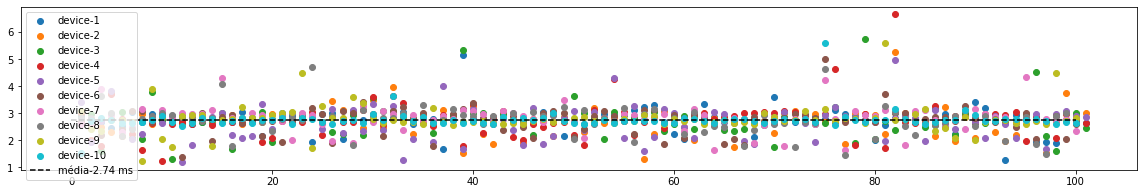

In [7]:
i=1
fig, ax = plt.subplots(figsize=(20,3),dpi=72)
for port in ports:
  data_mean.append(data[port]["RTT"].mean())
  ax.scatter(data[port]["RTT"].index,data[port]["RTT"], label='device-{}'.format(i))
  i+=1
ax.hlines(mean(data_mean), xmax=100, xmin=0, linestyles="dashed", color="black" ,label='média-{} ms'.format(round(mean(data_mean),2)))
ax.legend()




In [8]:
## Analisando outliers
df_novo = {}
for port in ports:
  data[port]
  q3, q1 = np.percentile(data[port]["RTT"], [75, 25])
  interquartil = q3 - q1
  limite_superior =q3 + 1.5 * interquartil
  limite_inferior = q1 - 1.5 * interquartil 
  df_novo[port] = data[port].loc[((data[port]["RTT"]>limite_inferior) & (data[port]["RTT"]<limite_superior))]
  dados_excluidos = data[port]["RTT"].shape[0] - len(df_novo[port])

  print("Nossa nova média é {}" .format(np.mean(df_novo[port]["RTT"])))
  print("Nossa média antiga era {}" .format(np.mean(data[port]["RTT"])))
  print("Foram eliminados o total de {} outliers"  .format(dados_excluidos))
  media =np.mean(df_novo[port]["RTT"])



Nossa nova média é 2.8229280481925922
Nossa média antiga era 2.74760024752544
Foram eliminados o total de 18 outliers
Nossa nova média é 2.680285400000876
Nossa média antiga era 2.692814108912097
Foram eliminados o total de 6 outliers
Nossa nova média é 2.7100139560427343
Nossa média antiga era 2.7496151485140086
Foram eliminados o total de 10 outliers
Nossa nova média é 2.765685642856397
Nossa média antiga era 2.758411683167524
Foram eliminados o total de 17 outliers
Nossa nova média é 2.6144305656591103
Nossa média antiga era 2.6545591683191216
Foram eliminados o total de 2 outliers
Nossa nova média é 2.7990910229893817
Nossa média antiga era 2.7288624100003744
Foram eliminados o total de 13 outliers
Nossa nova média é 2.829464709303045
Nossa média antiga era 2.8033949900007826
Foram eliminados o total de 14 outliers
Nossa nova média é 2.7907997647050102
Nossa média antiga era 2.7429988799991634
Foram eliminados o total de 15 outliers
Nossa nova média é 2.7555183580249727
Nossa média

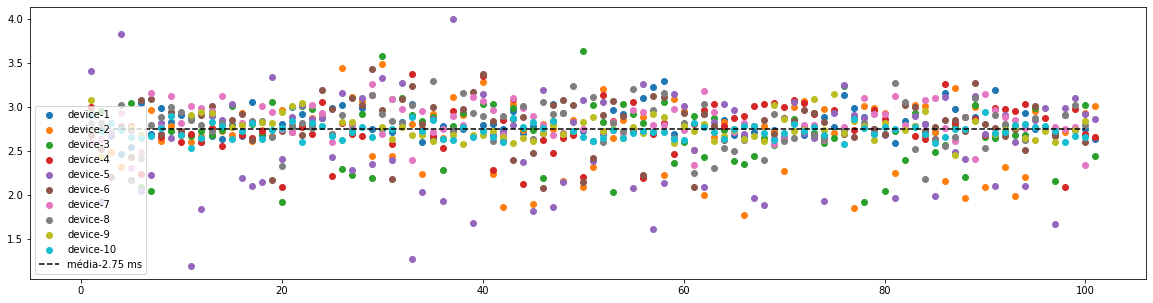

In [9]:
i=1
data_mean_outlier = []
fig, ax = plt.subplots(figsize=(20,5),dpi=72)
for port in ports:
  data_mean_outlier.append(df_novo[port]["RTT"].mean())

  ax.scatter(df_novo[port]["RTT"].index,df_novo[port]["RTT"], label='device-{}'.format(i))
  i+=1

ax.hlines(mean(data_mean), xmax=100, xmin=0, linestyles="dashed", color="black" ,label='média-{} ms'.format(round(mean(data_mean_outlier),2)))
ax.legend()

In [10]:
t = 0
regressao = pd.DataFrame()
for key, value in data.items():
  regressao = pd.concat([regressao,value])

regressao.reset_index()
regressao.to_csv("regressao-10-246-100.csv",index=False)